In [62]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
% matplotlib inline

# The above command sets the backend of matplotlib to the 'inline' backend. 
# It means the output of plotting commands is displayed inline.

UsageError: Line magic function `%` not found.


In [64]:
#importing dataset
df = pd.read_csv("fpl_cost_vs_efficiency.csv")

In [65]:
#Data Analysis
print(df.shape)

(48, 2)


In [66]:
#Top 5 rows of the dataset
print(df.head())

   cost   season ppm
0   4.0     4.000000
1   4.5     5.555556
2   5.0     5.400000
3   4.5     5.111111
4   5.5     5.090909


In [67]:
#Renaming the single column to 'cost'
df.columns = ['cost', 'efficiency']

In [68]:
#top 5 rows after renaming columns
print(df.head())

   cost  efficiency
0   4.0    4.000000
1   4.5    5.555556
2   5.0    5.400000
3   4.5    5.111111
4   5.5    5.090909


In [69]:
#data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cost        48 non-null     float64
 1   efficiency  48 non-null     float64
dtypes: float64(2)
memory usage: 900.0 bytes
None


In [70]:
#descriptive version of the dataset
print(df.describe())

            cost  efficiency
count  48.000000   48.000000
mean    5.168750    3.574443
std     0.795775    0.693733
min     4.000000    2.727273
25%     4.500000    3.111111
50%     5.000000    3.392308
75%     5.500000    3.862876
max     7.500000    5.555556


In [75]:
#input or independent variable
X = df["cost"].values

#output or dependent variable
y = df["efficiency"].values

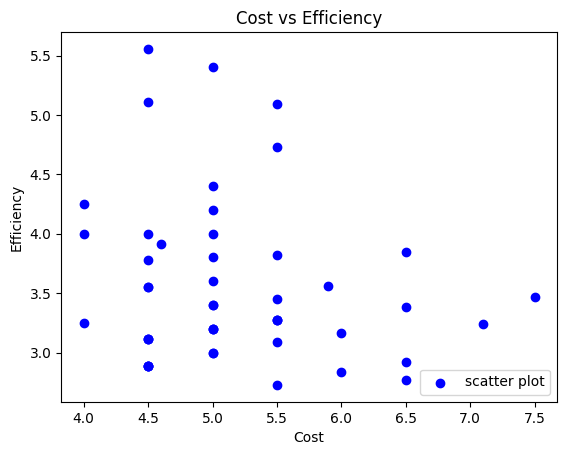

In [76]:
plt.scatter(X, y, color='blue', label='scatter plot')  
plt.title('Cost vs Efficiency')
plt.xlabel('Cost')
plt.ylabel('Efficiency')
plt.legend(loc=4)
plt.show()

In [79]:
#Dimensions of x and y

print(X.shape)
print(y.shape)

(48, 1)
(48, 1)


In [80]:
#Reshaping X and y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [81]:
#print after reshaping
print(X.shape)
print(y.shape)

(48, 1)
(48, 1)


In [ ]:
#Plit X and y into training and testing sets

from sklearn.model_selection import train_test_split    
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [83]:
#Print the dimensions
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(y_test.shape)

(32, 1)
(16, 1)
(16, 1)
(16, 1)


In [86]:
#The model is ready for training and testing 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#Training the model
lm.fit(X_train,y_train)

#Now comes the Testing part
y_pred=lm.predict(X_test)




In [85]:
a = lm.coef_
b = lm.intercept_
print("Estimated model slope a: ", a)
print("Estimated model intercept b: ", b)

Estimated model slope a:  [[-0.15593591]]
Estimated model intercept b:  [4.32500902]


In [ ]:
#So our fittest regression line is 
# y = -0.15593591*x + 4.32500902
#This is our Linear Model

In [87]:
lm.predict(X)[0:5]

array([[3.70126536],
       [3.6232974 ],
       [3.54532944],
       [3.6232974 ],
       [3.46736149]])

In [ ]:
#Evaluating the model performance
#Calculate and printing the RMSE value
#Lower the RMSE value, better the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))



RMSE value: 0.6946


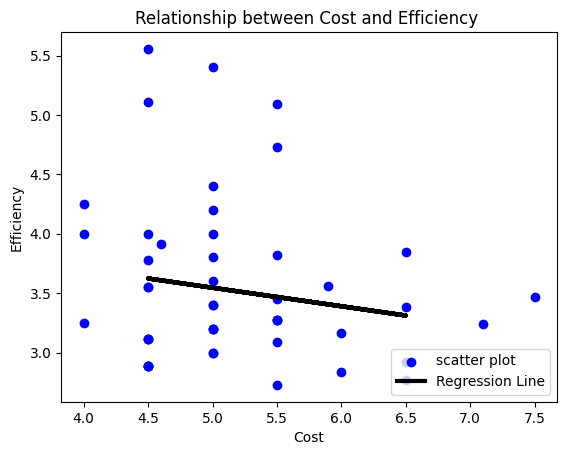

In [91]:
#Plotting the regression line
plt.scatter(X, y, color = 'blue', label = 'scatter plot')
plt.plot(X_test, y_pred, color = 'black', linewidth = 3, label = 'Regression Line')
plt.title("Relationship between Cost and Efficiency ")
plt.xlabel('Cost')
plt.ylabel('Efficiency')
plt.legend(loc=4)
plt.show()

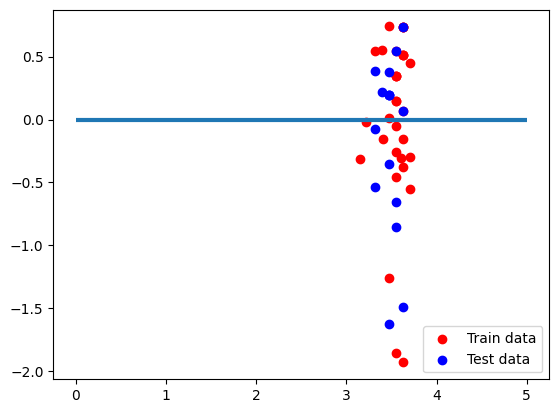

In [92]:
#Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 5, y = 0, linewidth = 3)
plt.legend(loc = 4)
plt.show()


In [ ]:
#Checking for overfitting and underfitting
print("Training set score: {:.4f}".format(lm.score(X_train, y_train)))
print("Testing set score: {:.4f}".format(lm.score(X_test, y_test)))
#it is very underfitted model as the training score is very high as compared to testing score
#so our dataset is not ideal for linear regression


Training set score: 0.0347
Testing set score: 0.0006


In [97]:
#Save model for future use
import joblib
joblib.dump(lm, 'lm_regressor.pkl')

#To load the model
#lm2=joblib.load('lm_regressor.pkl')

['lm_regressor.pkl']